In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#primero se importan las librerias a utilizar 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import accuracy_score

In [0]:
dataframe = pd.read_csv('/content/drive/My Drive/Mediciones en csv/LTLOS CSV/potencia 2000-01-31 20_3A03_3A36 Antenna Horn Time 300[s] SwitchingBy 0 Horn 0 Omni 0 FIN_030.csv')

In [0]:
dataset = dataframe.values


In [0]:
#dataset
POT = dataset[0:len(dataset),1]
print(POT.shape)

(210830,)


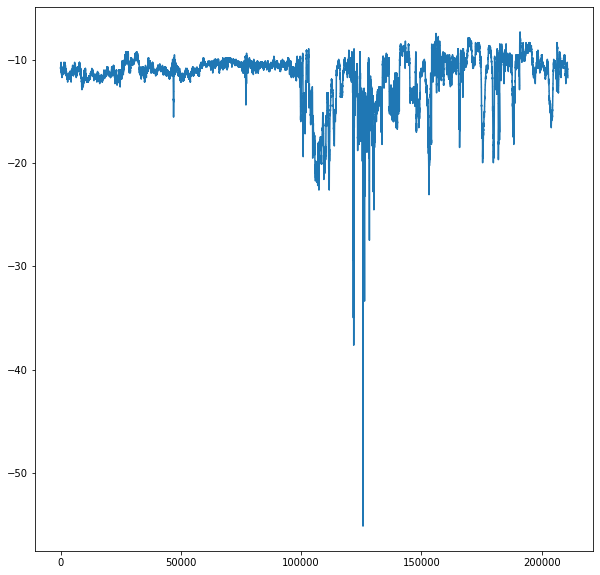

In [0]:
plt.figure(figsize=[10,10])
plt.plot(POT)

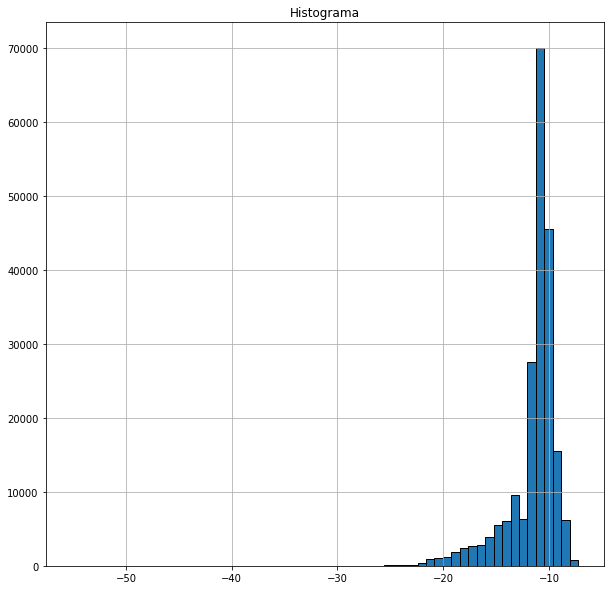

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=[10,10])
plt.title('Histograma')
plt.hist(POT, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

In [0]:
#llevo la funcion a un arreglo de [lARGO DEL ARREGLO ,1] PARA ESCALAR LOS DATOS
POT2=POT.reshape(len(POT),1)
print(POT2.shape)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
POT2 = scaler.fit_transform(POT2)

(210830, 1)


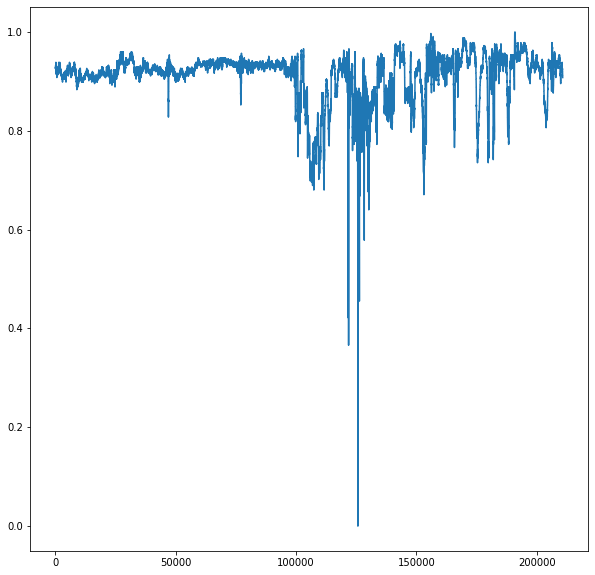

In [0]:
plt.figure(figsize=[10,10])
plt.plot(POT2)

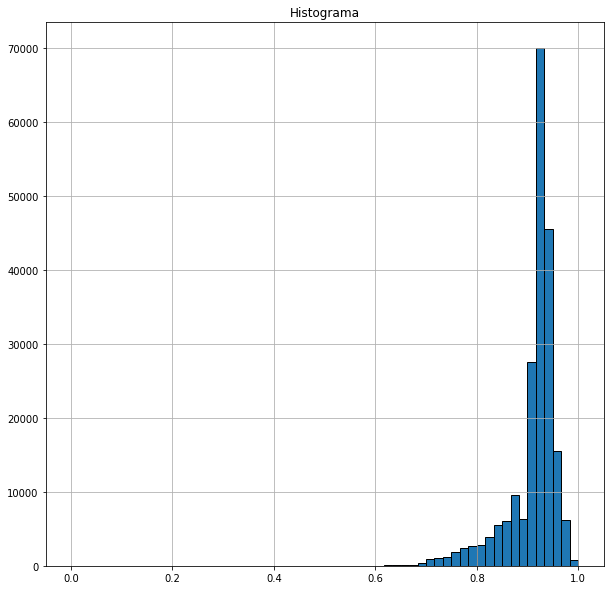

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=[10,10])
plt.title('Histograma')
plt.hist(POT2, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

In [0]:
# divido la funcion y1 en arreglos para entrenar y probar la red
train_size = int(len(POT2) * 0.8)
test_size = len(POT2) - train_size
train, test = POT2[0:train_size,:], POT2[train_size:len(POT2),:]
print(len(train), len(test))
print(train.shape)
print(test.shape)

168664 42166
(168664, 1)
(42166, 1)


In [0]:
# convertir un arreglo de valores en una matrix
def create_dataset(POT2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(POT2)-look_back-1):
        a = POT2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(POT2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
# reshape dentro X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
print(trainX[0])
print(trainY[0])
print(trainX[1])
print(trainY[1])
print(trainX[2])
print(trainY[2])

(168659, 4)
(42161, 4)
(168659,)
(42161,)
[0.92620388 0.92912237 0.92620388 0.92620388]
0.9262038774233896
[0.92912237 0.92620388 0.92620388 0.92620388]
0.9262038774233896
[0.92620388 0.92620388 0.92620388 0.92620388]
0.9262038774233896


In [0]:
# reshape a la entrada [samples, time steps, features] que es necesario para la red lstm
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(168659, 1, 4)
(42161, 1, 4)






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               68096     
_________________________________________________________________
dense_1 (Dense)              (None, 65)                8385      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 66        
Total params: 76,547
Trainable params: 76,547
Non-trainable params: 0
_________________________________________________________________


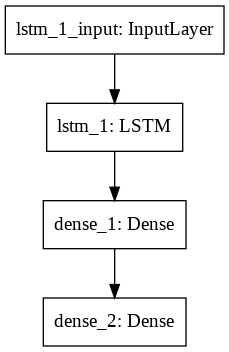

In [0]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(128, activation = 'relu',return_sequences=True,input_shape=(1, look_back)))
#model.add(LSTM(64,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(128, activation = 'relu',input_shape=(1, look_back)))
#model.add(Dense(125))
model.add(Dense(65, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
#model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])

model.summary()
keras.utils.plot_model(model, 'my_first_model.png')

In [0]:
History = model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





168659/168659 [==============================] - 25s 150us/step - loss: 0.0059 - mean_squared_error: 0.0059 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 1841.5114
Epoch 2/100
168659/168659 [==============================] - 15s 86us/step - loss: 7.3837e-06 - mean_squared_error: 7.3837e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 1676.6423
Epoch 3/100
168659/168659 [==============================] - 15s 88us/step - loss: 8.1383e-06 - mean_squared_error: 8.1383e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 1492.1003
Epoch 4/100
168659/168659 [==============================] - 15s 90us/step - loss: 8.2841e-06 - mean_squared_error: 8.2841e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 1454.7772
Epoch 5/100
168659/168659 [==============================] - 15s 89us/step - loss: 8.0536e-06 - mean_

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

print(trainPredict.shape)
print(trainY.shape)
print(testPredict.shape)
print(testY.shape)
trainY_error = trainY.reshape(1,len(trainY))
testY_error = testY.reshape(1,len(testY))
print(trainY_error.shape)
print(testY_error.shape)
# calcular el error mse
print('Train Mean Absolute Error:', mean_absolute_error(trainY_error[0], trainPredict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY_error[0], trainPredict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(testY_error[0], testPredict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY_error[0], testPredict[:,0])))

(168659, 1)
(168659,)
(42161, 1)
(42161,)
(1, 168659)
(1, 42161)
Train Mean Absolute Error: 0.001572693977451068
Train Root Mean Squared Error: 0.0021724088777240903
Test Mean Absolute Error: 0.0014385988339103942
Test Root Mean Squared Error: 0.0017560362580826873


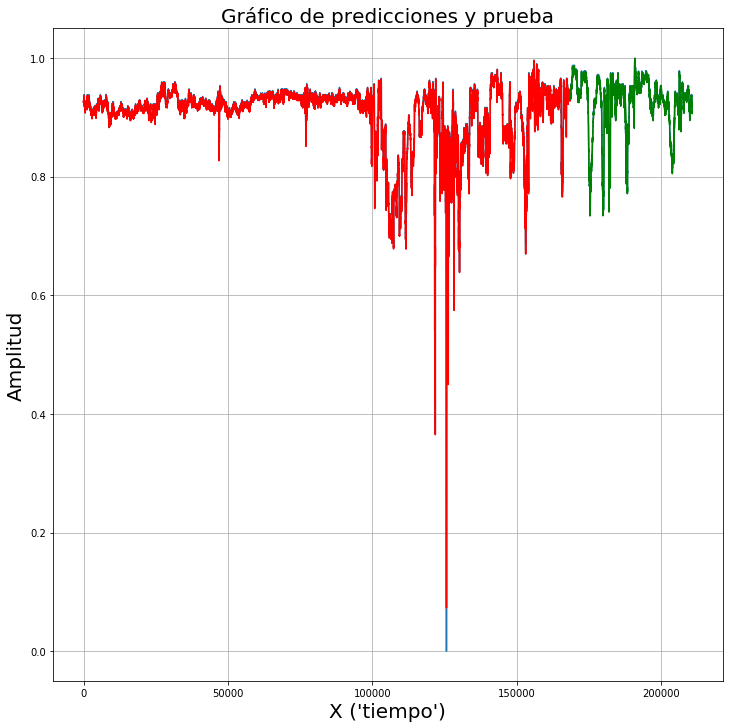

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(POT2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(POT2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(POT2)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[12,12])
plt.plot((POT2))
plt.plot(trainPredictPlot, color="red", )
plt.xlabel("X ('tiempo')",fontsize = 20)
plt.ylabel("Amplitud",fontsize = 20)
plt.plot(testPredictPlot, color="green")
plt.title("Gráfico de predicciones y prueba", fontsize = 20)
plt.grid()
plt.show()

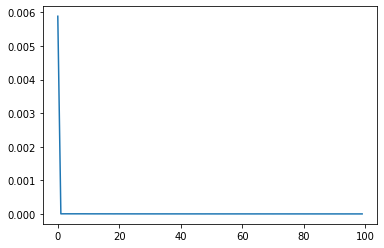

In [0]:
# plot metrics
plt.plot(History.history['mean_squared_error'])

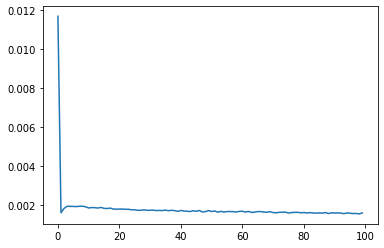

In [0]:
plt.plot(History.history['mean_absolute_error'])

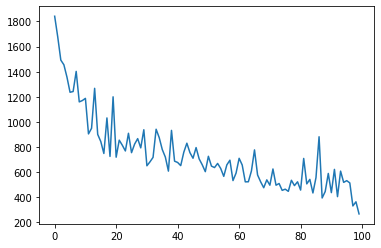

In [0]:
plt.plot(History.history['mean_absolute_percentage_error'])

In [0]:
# 5. make predictions
predictions = model.predict(testX, verbose=1)
print(predictions[:, 0])

42161/42161 [==============================] - 2s 56us/step
[0.9312881  0.9312881  0.9312881  ... 0.9067149  0.90674305 0.90674305]


In [0]:
len(predictions)

42161

In [0]:
len(DATOS_REAL)

42166

In [0]:
DATOS_REAL=test[:,0]
DATOS_REAL

array([0.93224932, 0.93224932, 0.93224932, ..., 0.90765061, 0.90765061,
       0.90765061])

In [0]:
predictions[0:12,0]

array([0.9312881 , 0.9312881 , 0.9312881 , 0.9312881 , 0.9312881 ,
       0.9312881 , 0.9312881 , 0.9312881 , 0.9312881 , 0.9312881 ,
       0.9312881 , 0.93347955], dtype=float32)

In [0]:
DATOS_REAL[0:14]

array([0.93224932, 0.93224932, 0.93224932, 0.93224932, 0.93224932,
       0.93224932, 0.93224932, 0.93224932, 0.93224932, 0.93224932,
       0.93224932, 0.93224932, 0.93224932, 0.93224932])

In [0]:
predictions[42000:42166,0]


array([0.9221375 , 0.9221375 , 0.9221375 , 0.9221375 , 0.9221375 ,
       0.9243338 , 0.92495763, 0.9230808 , 0.92243534, 0.9243139 ,
       0.92495763, 0.92527676, 0.92306036, 0.9246331 , 0.9227413 ,
       0.9246528 , 0.92493814, 0.92527676, 0.92525727, 0.92525727,
       0.92525727, 0.92525727, 0.92525727, 0.92525727, 0.92525727,
       0.92525727, 0.92525727, 0.92525727, 0.92525727, 0.92525727,
       0.92525727, 0.92525727, 0.92525727, 0.92525727, 0.92525727,
       0.92525727, 0.92306036, 0.9246331 , 0.9227413 , 0.9246528 ,
       0.92493814, 0.92527676, 0.92525727, 0.92525727, 0.92525727,
       0.92525727, 0.92525727, 0.92525727, 0.92525727, 0.92306036,
       0.9246331 , 0.9227413 , 0.9246528 , 0.92493814, 0.9230808 ,
       0.92243534, 0.9221166 , 0.9221375 , 0.9221375 , 0.9221375 ,
       0.9221375 , 0.9221375 , 0.9221375 , 0.9221375 , 0.9221375 ,
       0.9221375 , 0.9221375 , 0.91993886, 0.91931343, 0.9211942 ,
       0.92183983, 0.92215836, 0.9221375 , 0.9221375 , 0.92213

In [0]:
print(len(predictions[42000:42166,0]))

161


In [0]:
print(len(DATOS_REAL[42003:42164]))

161


In [0]:
DATOS_REAL[42003:42164]

array([0.92307692, 0.92307692, 0.92307692, 0.92307692, 0.92307692,
       0.92620388, 0.92620388, 0.92307692, 0.92307692, 0.92620388,
       0.92620388, 0.92620388, 0.92307692, 0.92620388, 0.92307692,
       0.92620388, 0.92620388, 0.92620388, 0.92620388, 0.92620388,
       0.92620388, 0.92620388, 0.92620388, 0.92620388, 0.92620388,
       0.92620388, 0.92620388, 0.92620388, 0.92620388, 0.92620388,
       0.92620388, 0.92620388, 0.92620388, 0.92620388, 0.92620388,
       0.92620388, 0.92307692, 0.92620388, 0.92307692, 0.92620388,
       0.92620388, 0.92620388, 0.92620388, 0.92620388, 0.92620388,
       0.92620388, 0.92620388, 0.92620388, 0.92620388, 0.92307692,
       0.92620388, 0.92307692, 0.92620388, 0.92620388, 0.92307692,
       0.92307692, 0.92307692, 0.92307692, 0.92307692, 0.92307692,
       0.92307692, 0.92307692, 0.92307692, 0.92307692, 0.92307692,
       0.92307692, 0.92307692, 0.91994997, 0.91994997, 0.92307692,
       0.92307692, 0.92307692, 0.92307692, 0.92307692, 0.92307